This is a medical dataset. Without much domain understanding, based on generic ideas of logestic model we will try to build the model.

This is a classification problem with dependent variable has 2 values: normal and abnormal.Normal is a person does not have back pain and abnormal is has back pain.
12 independent variable. All 12 are numeric features.

GML typically work with numerical output. String output needs to be converted into numerical output for GLM model.

We are going to predict if a person has back pain or not by analysing the 12 variables.

In [34]:
#Loading libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#loading data
dataSet = pd.read_csv('Dataset_spine.csv')

# EDA

In [3]:
dataSet.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att,Unnamed: 13
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal,NaN
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal,NaN
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal,Prediction is done by using binary classificat...
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal,NaN
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal,NaN


Observation:

    non of the column is named
    
    13th column is not getting used, so will remove it

In [9]:
# Deleting 13th column
del dataSet['Unnamed: 13']

In [10]:
#Naming all the columns
dataSet.columns = ['pelvic_incidence','pelvic tilt','lumbar_lordosis_angle','sacral_slope','pelvic_radius','degree_spondylolisthesis','pelvic_slope','Direct_tilt','thoracic_slope','cervical_tilt','sacrum_angle','scoliosis_slope','Status']

In [11]:
dataSet.describe()

,pelvic_incidence,pelvic tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694,0.472979,21.321526,13.064511,11.933317,-14.053139,25.645981
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027,0.285787,8.639423,3.399713,2.893265,12.225582,10.450558
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179,0.003220,7.027000,7.037800,7.030600,-35.287375,7.007900
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727,0.224367,13.054400,10.417800,9.541140,-24.289522,17.189075
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934,0.475989,21.907150,12.938450,11.953835,-14.622856,24.931950
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352,0.704846,28.954075,15.889525,14.371810,-3.497094,33.979600
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082,0.998827,36.743900,19.324000,16.821080,6.972071,44.341200


Observations:

    No missing value
    
    degree_spondylolisthesis is right skew as mean is on the right side on median.
    
    sacrum_angle has outlier.
    
    Ways to detect outlier:
    IQR : IQR = Q3 – Q1. The data points which fall below Q1 – 1.5 IQR or above Q3 + 1.5 IQR are outliers.
    Z-Score : 3 standard deviation away from mean

In [13]:
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic tilt               310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   pelvic_slope              310 non-null    float64
 7   Direct_tilt               310 non-null    float64
 8   thoracic_slope            310 non-null    float64
 9   cervical_tilt             310 non-null    float64
 10  sacrum_angle              310 non-null    float64
 11  scoliosis_slope           310 non-null    float64
 12  Status                    310 non-null    object 
dtypes: float64(12), object(1)
memory usage: 31.6+ KB


Observations:
    
11 numerical column and status object type column.

### Univariate Analysis

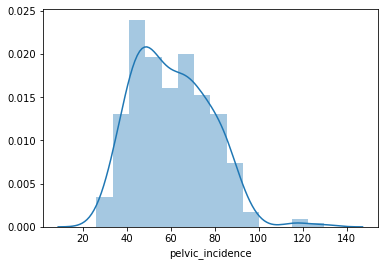

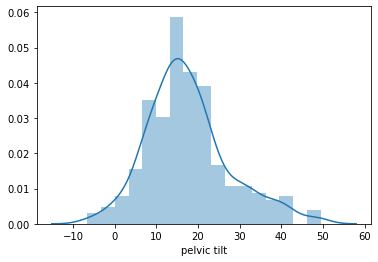

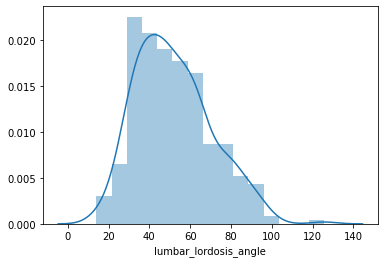

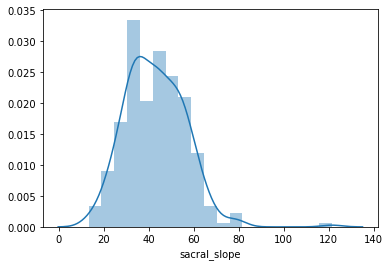

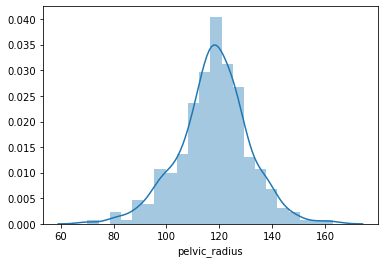

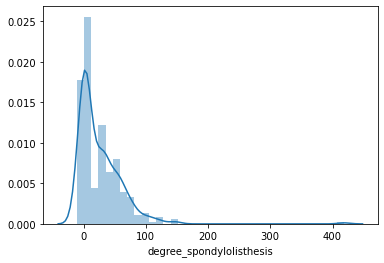

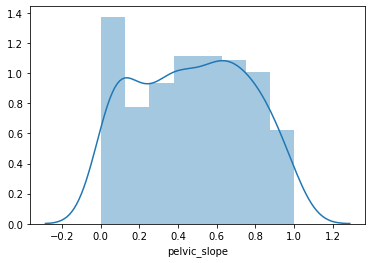

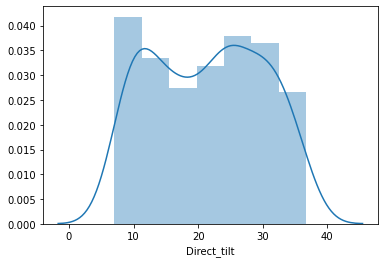

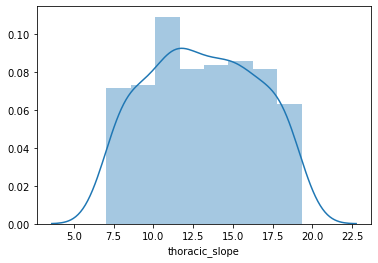

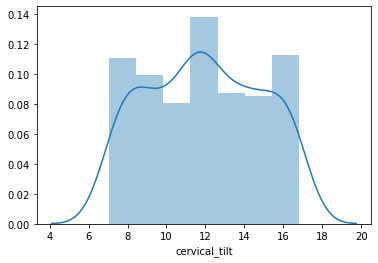

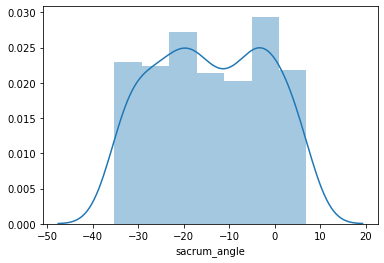

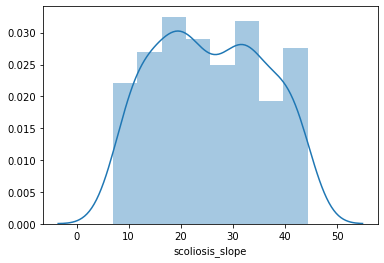

In [35]:
for i, col in enumerate(dataSet.columns):
    if(col != 'Status'):
        plt.figure()
        sns.distplot(dataSet[col])

Observations:

    pelvic_incidence, lumbar_lordosis_angle, degree_spondylolisthesis is right skew
    
    pelvic tilt, sacral_slope, pelvic_radius, thoracic_slope is approx normal 
    
    pelvic_slope, Direct_tilt, saccrum_angle, scoliosis_slope
    

### Basic steps for a classification problem, when we try to create a classifier.

1. Checking the balance in dependent variable - the only categorical column in dataset
2. Correlation analysis
3. How the classes in binary classification are different from each other. looking at the central tendency of each independent variable.

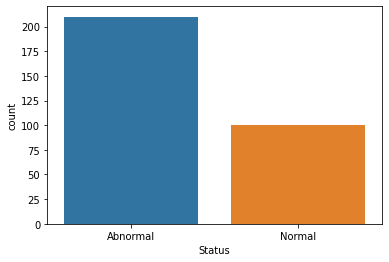

In [39]:
# Checking the balance in dependent variable - the only categorical column in dataset
sns.countplot(dataSet["Status"])

Observation: 
    Data is balanced here

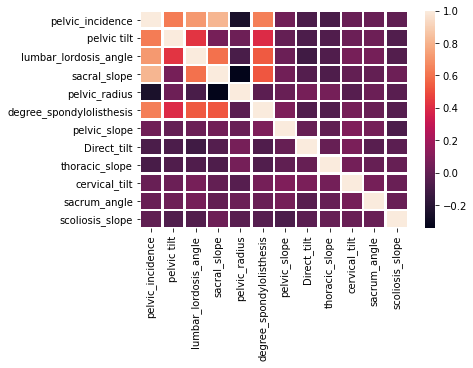

In [68]:
# Correlation Analysis
sns.heatmap(dataSet.corr(), fmt='.2f', linewidths=1.5)

Presence of high correlation between independent variables is not good for logistic regression just like in linear regression.

Typically, right hand side of the equation is a linear combination of independent variables and it's a line ultimately we are passing though a sigmoid function.

We will try to see if it's a problem for our model.

Below pelvi_slope correlation does not exists much. So will see the values above it

In [50]:
# seeing the correlation value
dataSet.corr()

,pelvic_incidence,pelvic tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope
pelvic_incidence,1.000000,0.629199,0.717282,0.814960,-0.247467,0.638743,0.043290,-0.078411,-0.089740,0.016750,0.019240,-0.007251
pelvic tilt,0.629199,1.000000,0.432764,0.062345,0.032668,0.397862,0.008852,-0.072119,-0.063394,0.028931,0.032859,-0.056550
lumbar_lordosis_angle,0.717282,0.432764,1.000000,0.598387,-0.080344,0.533667,0.029486,-0.112939,-0.063582,0.063875,0.057199,-0.049054
sacral_slope,0.814960,0.062345,0.598387,1.000000,-0.342128,0.523557,0.048988,-0.046914,-0.067968,-0.000063,0.000207,0.032853
pelvic_radius,-0.247467,0.032668,-0.080344,-0.342128,1.000000,-0.026065,0.015767,0.063433,0.060477,-0.039800,0.029738,-0.030145
degree_spondylolisthesis,0.638743,0.397862,0.533667,0.523557,-0.026065,1.000000,0.085925,-0.063812,-0.057286,0.056576,0.023021,-0.041023
pelvic_slope,0.043290,0.008852,0.029486,0.048988,0.015767,0.085925,1.000000,0.012694,-0.011770,0.088017,0.060743,-0.073893
Direct_tilt,-0.078411,-0.072119,-0.112939,-0.046914,0.063433,-0.063812,0.012694,1.000000,0.009887,0.072738,-0.037428,-0.024021
thoracic_slope,-0.089740,-0.063394,-0.063582,-0.067968,0.060477,-0.057286,-0.011770,0.009887,1.000000,0.052451,0.011354,0.009541
cervical_tilt,0.016750,0.028931,0.063875,-0.000063,-0.039800,0.056576,0.088017,0.072738,0.052451,1.000000,0.057451,0.021243


Observations:
    
    pelvic tilt, lumbar_lordosis_angle, sacral_slope, degree_spondylolisthesis have high correlation.
    
    Definitely multi-collinearity problem is there in dataset.

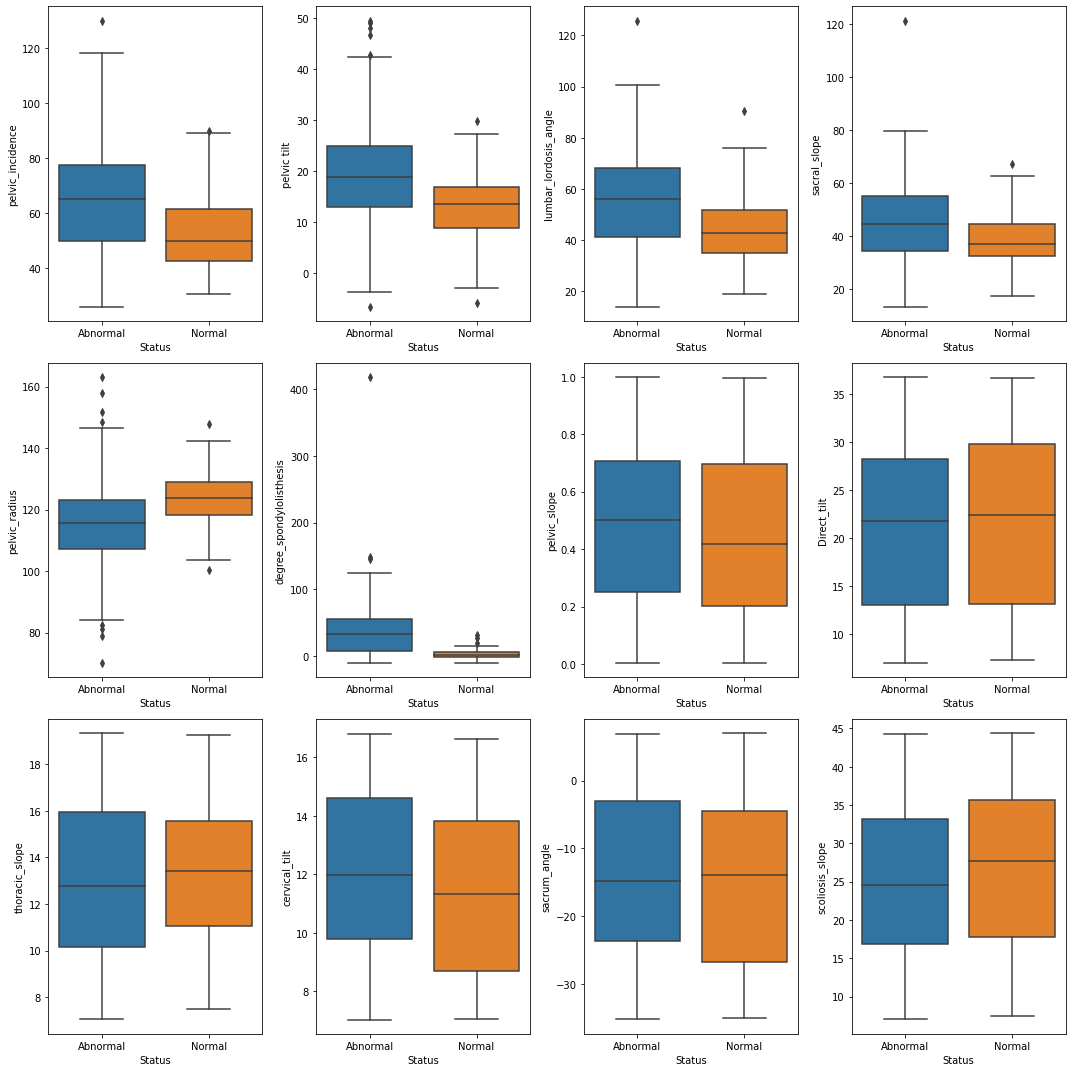

In [55]:
#how the two classes are different from each other with respect to each independent variable - visualizing with box plot
## Generating 3*4 matrix of box plots
fig, axes = plt.subplots(3, 4, figsize = (15,15))
axes = axes.flatten()

for i in range(0,len(dataSet.columns)-1):
    sns.boxplot(x="Status", y=dataSet.iloc[:,i], data=dataSet, orient='v', ax=axes[i])

plt.tight_layout()
plt.show()

Observation:
    1st 6 columns will significantly impact my analysis.

# Data Preprocessing Step
    .....getting data ready for model

### 1. Treating the Dependent variable: 
        .....converting it to a number

In [57]:
dataSet.loc[dataSet['Status'] == 'Abnormal','Status'] = 1
dataSet.loc[dataSet['Status'] == 'Normal','Status'] = 0

### 2. Data preprocessing using sklearn library:

In [60]:
X = dataSet.loc[:,dataSet.columns != 'Status']
y = dataSet.loc[:,dataSet.columns == 'Status']

Three steps of data preporcessing:
1. split the data
2. scaled the x-variable
3. convert the y-variable data type from object to int

In [71]:
# Importing libraries related to preprocessing:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [72]:
def data_preprocess(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y.values.ravel(), test_size=0.3, random_state=0)  
    scaler = StandardScaler(copy=True, with_mean=True, with_std=True)

    scaler.fit(X_train)

    # Now apply the transformations to the data:
    train_scaled = scaler.transform(X_train)
    test_scaled = scaler.transform(X_test)
    
    # convert the y-variable data type to int :
    y_train=y_train.astype('int')
    y_test=y_test.astype('int')
    return(train_scaled, test_scaled, y_train, y_test)

# Standardize features by removing the mean and scaling to unit variance
# The standard score of a sample x is calculated as:
# z = (x - u) / s

In [73]:
X_train_scaled, X_test_scaled, y_train, y_test = data_preprocess(X,y)

# Building the Model

In [76]:
#importing required libraries
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

In [77]:
def logistic_regression(x,y):
    logreg = LogisticRegression().fit(x, y)
    return(logreg)

## Model 1

In [78]:
logreg_result = logistic_regression(X_train_scaled, y_train)

In [83]:
#print the train - test scores
print("Training score : {:.2f}".format(logreg_result.score(X_train_scaled,y_train)))
print("Testing score : {:.2f}".format(logreg_result.score(X_test_scaled,y_test)))

Training score : 0.88
Testing score : 0.82


In [85]:
# While the previous model implemented was good in predicting the Target variable on a test set, 
# we did not interpret anything about the individual features - which variable(s) influence the Target variable more.
sm.Logit(y_train,X_train_scaled).fit().summary2()

         Current function value: 0.473055
         Iterations: 35


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Logit
=====================================================================
Model:                Logit             Pseudo R-squared:  0.248     
Dependent Variable:   y                 AIC:               229.3058  
Date:                 2021-04-02 20:02  BIC:               269.8646  
No. Observations:     217               Log-Likelihood:    -102.65   
Df Model:             11                LL-Null:           -136.45   
Df Residuals:         205               LLR p-value:       3.4943e-10
Converged:            0.0000            Scale:             1.0000    
No. Iterations:       35.0000                                        
---------------------------------------------------------------------
     Coef.     Std.Err.      z    P>|z|      [0.025         0.975]   
---------------------------------------------------------------------
x1   0.0814 11482676.3676  0.0000 1.0000 -22505632.0452 22505632.2080
x2   0.0765  6545064.3181  0.0000 1.0000 -12828090.2634 12828090.4165
x3  -0.2797        0.3142 -0.8904 0.3733        -0.8955        0.3361
x4  -0.5412  9034732.5670 -0.0000 1.0000 -17707750.9824 17707749.9000
x5  -1.1234        0.2351 -4.7773 0.0000        -1.5842       -0.6625
x6   2.3250        0.4401  5.2832 0.0000         1.4625        3.1875
x7   0.1711        0.1790  0.9561 0.3390        -0.1797        0.5220
x8  -0.2115        0.1770 -1.1950 0.2321        -0.5583        0.1354
x9   0.0724        0.1738  0.4166 0.6770        -0.2683        0.4131
x10  0.2003        0.1772  1.1301 0.2584        -0.1471        0.5476
x11 -0.1042        0.1804 -0.5778 0.5634        -0.4578        0.2493
x12 -0.2749        0.1764 -1.5579 0.1193        -0.6207        0.0709
=====================================================================

"""

Observations:
 - The above model did not converge because some variables were highly correlated with each other and this would have led to the correlation/ covariance matrix to be singular. 
 - A matrix can become singular if any rows(columns) can be expressed as a linear combination of any other rows (columns). 
 - In fact, it was very intersting to note that in our data, the Pelvic Incidence column values are an exact sum of Pelvic Tilt and Sacral Slope. So that explains.
 - Also in our statistical test results, the Standard error values are very high and p-value is 1 for these three variables. Hence we will remove them and re run the model. 
    
    

"Maximum Likelihood optimization failed to converge. "

means whatever the inherent objective model was trying to achieve havn't achieved within the maximum number of iterations the model is allowed to perform.

If a model does not converged whatever results we get out of it is not very trustable.

In [87]:
#Removing the highly correlated variables which also had high standard error
cols_to_include = [cols for cols in X.columns if cols not in ['pelvic_incidence', 'pelvic tilt','sacral_slope']]
X = dataSet[cols_to_include]

In [88]:
X_train_scaled, X_test_scaled, y_train, y_test = data_preprocess(X,y)

logreg_result = logistic_regression(X_train_scaled, y_train)

print("Training set score: {:.3f}".format(logreg_result.score(X_train_scaled,y_train)))
print("Test set score: {:.3f}".format(logreg_result.score(X_test_scaled,y_test)))

Training set score: 0.848
Test set score: 0.753


The test results indicate that the predictive power has gone down after removing the highly correlated variables. Let us look at the statistical summary below.

In [89]:
# to get the statistical summary of the new model
logit_model=sm.Logit(y_train,X_train_scaled)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.481933
         Iterations 7
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.234     
Dependent Variable: y                AIC:              227.1591  
Date:               2021-04-02 22:56 BIC:              257.5781  
No. Observations:   217              Log-Likelihood:   -104.58   
Df Model:           8                LL-Null:          -136.45   
Df Residuals:       208              LLR p-value:      8.5613e-11
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
--------------------------------------------------------------------
       Coef.     Std.Err.       z       P>|z|      [0.025     0.975]
--------------------------------------------------------------------
x1    -0.5434      0.2568    -2.1158    0.0344    -1.0468    -0.0400
x2    -0.9642      0.2080    -4.6364    0.0000    -1.3

Observation:

    Model has converged now in 7 iterations only. Optimization is achieved.
    AIC and BIC has gone down from a comparasion to our earlier model. Model is seeing lesser information loss from AIC we can get it.
    BIC has come down more significantly than AIC as we reduced the number of columns in our analysis.
    
    This model has performed better than previous model based on this analysis we can conclude. Although test scores are not as good as the pervios model has.
    
    Observing  p>|z| :
    At 95%, x1, x2, x3 are significant
    At 90%, x1, x2, x3, x9 are significant

## Model 2 - Building model with significant variables(95% level of significance)

In [90]:
# considering only the variables which have p-value less than 0.05
X_trim_1 = X.loc[:,['lumbar_lordosis_angle','pelvic_radius','degree_spondylolisthesis']]

In [91]:
X_train_scaled, X_test_scaled, y_train, y_test = data_preprocess(X_trim_1,y)

logreg_result = logistic_regression(X_train_scaled, y_train)

print("Training set score: {:.3f}".format(logreg_result.score(X_train_scaled,y_train)))
print("Test set score: {:.3f}".format(logreg_result.score(X_test_scaled,y_test)))

#Traning and Test score has improved

Training set score: 0.857
Test set score: 0.774


In [92]:
logit_model=sm.Logit(y_train,X_train_scaled)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.498420
         Iterations 7
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.207     
Dependent Variable: y                AIC:              222.3145  
Date:               2021-04-02 22:57 BIC:              232.4542  
No. Observations:   217              Log-Likelihood:   -108.16   
Df Model:           2                LL-Null:          -136.45   
Df Residuals:       214              LLR p-value:      5.1622e-13
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
--------------------------------------------------------------------
       Coef.     Std.Err.       z       P>|z|      [0.025     0.975]
--------------------------------------------------------------------
x1    -0.4688      0.2426    -1.9325    0.0533    -0.9443     0.0067
x2    -0.9188      0.2037    -4.5100    0.0000    -1.3

Observations:
1. AIC and BIC has improved. Impact on BIC is more than AIC since we have significanlty reduced the number of exploratory variable in our analysis.
    Based on AIC and BIC model is doing better than previous one.
2. x1 we can accept on 94.7% of significance.

y = -0.46X1 -0.91X2 + 2.18X3
odds of having backpain in negatively impacted by x1 and x2. 
odds of having backpain in positively impacted by x3.

### Confusion Matix

Confusion Matrix to check the model's performace

4 measures:
    1. Overall accuracy/Misclassification accuracy
    2. Sensitivity/Recall
    3. Specificity/Precision
    4. F1 score

In [93]:
# assigning the model predicted values to y_pred
y_pred = logreg_result.predict(X_test_scaled)

# assigning the string Normal and Abnormal to the 0 and 1 values respectively. This is useful in plotting 
# the confusion matrix
y_pred_string = y_pred.astype(str)
y_pred_string[np.where(y_pred_string == '0')] = 'Normal'
y_pred_string[np.where(y_pred_string == '1')] = 'Abnormal'

y_test_string = y_test.astype(str)
y_test_string[np.where(y_test_string == '0')] = 'Normal'
y_test_string[np.where(y_test_string == '1')] = 'Abnormal'

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass labels=['Abnormal', 'Normal'] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


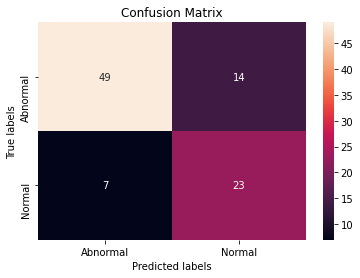

In [94]:
# Gauging model accuracy

from sklearn.metrics import confusion_matrix
ax= plt.subplot()
labels = ['Abnormal','Normal']
cm = confusion_matrix(y_test_string, y_pred_string, labels)
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Abnormal', 'Normal']); ax.yaxis.set_ticklabels(['Abnormal', 'Normal']);
plt.show()

Misclassificaion Accuracy/Overall Accuracy = (correct prediction)/(Total Predictions)
49+23/49+23+7+14  = 0.774 = 77.4%

Sensitivity/Recall = true positive predicted/true positive predicted + false negative predicted
49/49+7 = 0.777 = 77.7%

Specificity/Precision = true postive predicted/true postive predicted + false postive predicted
49/49+14 = 0.875 = 87.5%

F1 Score = (1/Recall+1/Precision)/2
(1/0.777 + 1/0.875)/2 = 0.823 = 82.3% 


confusion matrix is give acceptable accuracy level for positive class but for negative class if we try to predict model is not doing well.
Predicting positive class is as important as negative class.
TN/TN+FN = 62%

So this matix is not the best way to evalutate when we need to consider the negative class too or dataset is unbalanced. 
Issues with confusion matix:
    1. Lack of foccus on the negative class.
    2. Highly unbalanced dataset.
    
So we will check another matix called 'MCC' - Mathews Correlation Coefficients. This matix overcome both the problems of confusion matrix. Higher the MCC better the model.


### ROC - Reciever Operating Characterstics

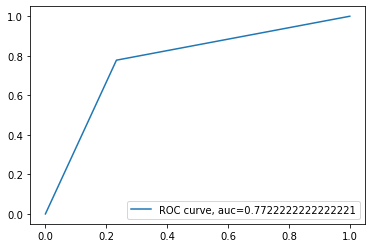

In [97]:
from sklearn import metrics
fpr, tpr, threshholds = metrics.roc_curve(y_test, y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)
plt.plot(fpr, tpr, label="ROC curve, auc="+str(auc))
plt.legend(loc=4)
plt.show()

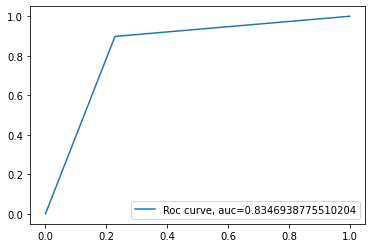

In [110]:
y_pred_train = logreg_result.predict(X_train_scaled)
fpr, tpr, threshholds = metrics.roc_curve(y_train, y_pred_train)
auc = metrics.roc_auc_score(y_train, y_pred_train)
plt.plot(fpr,tpr,label="Roc curve, auc="+str(auc))
plt.legend(loc=4)
plt.show()

#### ROC by - predict probabilities

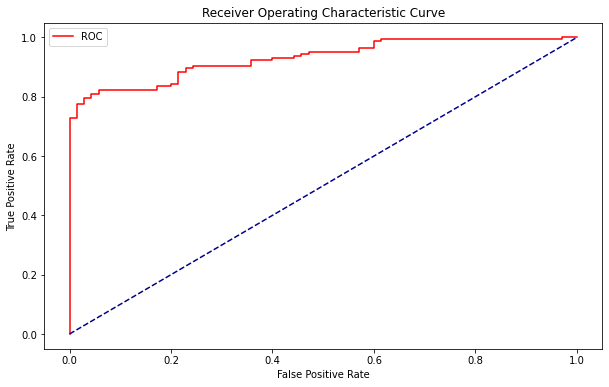

In [122]:
from sklearn.metrics import roc_curve

#predict probabilities 
# predict_proba will give the probability of both the classes 0 (nagative class) and 1 (positive class) in 2-D array
probs = logreg_result.predict_proba(X_train_scaled)

#Keeping only positive class
probs = probs[:, 1]

#Keeping only nagative class
# probs = probs[:, 0]

#Calculating the FPR and TPR
fpr, tpr, thresholds = roc_curve(y_train, probs)

#Plotting the figure
plt.figure(figsize = (10,6))
plt.plot(fpr, tpr, color='red', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend()
plt.show()

## Model 3 - By removing only 2 columns out of 3 variables having multi-coliniarity

In [132]:
#Removing the highly correlated variables which also had high standard error
cols_to_include = [cols for cols in X.columns if cols not in ['pelvic_incidence']]
X = dataSet[cols_to_include]

# 'pelvic_incidence', 'pelvic tilt','sacral_slope'

In [133]:
X_train_scaled, X_test_scaled, y_train, y_test = data_preprocess(X,y)

logreg_result = logistic_regression(X_train_scaled, y_train)

print("Training set score: {:.3f}".format(logreg_result.score(X_train_scaled,y_train)))
print("Test set score: {:.3f}".format(logreg_result.score(X_test_scaled,y_test)))

Training set score: 0.848
Test set score: 0.753


In [134]:
sm.Logit(y_train,X_train_scaled).fit().summary2()

Optimization terminated successfully.
         Current function value: 0.481933
         Iterations 7


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.234     
Dependent Variable: y                AIC:              227.1591  
Date:               2021-04-03 14:33 BIC:              257.5781  
No. Observations:   217              Log-Likelihood:   -104.58   
Df Model:           8                LL-Null:          -136.45   
Df Residuals:       208              LLR p-value:      8.5613e-11
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
--------------------------------------------------------------------
       Coef.     Std.Err.       z       P>|z|      [0.025     0.975]
--------------------------------------------------------------------
x1    -0.5434      0.2568    -2.1158    0.0344    -1.0468    -0.0400
x2    -0.9642      0.2080    -4.6364    0.0000    -1.3719    -0.5566
x3     2.2963      0.4142     5.5443    0.0000     1.4846     3.1081
x4     0.1499      0.1771     0.8464    0.3974    -0.1972     0.4971
x5    -0.2442      0.1738    -1.4047    0.1601    -0.5849     0.0965
x6     0.0640      0.1732     0.3694    0.7118    -0.2754     0.4034
x7     0.2068      0.1747     1.1841    0.2364    -0.1355     0.5491
x8    -0.1183      0.1777    -0.6660    0.5054    -0.4666     0.2299
x9    -0.2872      0.1736    -1.6547    0.0980    -0.6274     0.0530
=================================================================

"""